In [1]:
#import Pkg; Pkg.add("ArchGDAL")
#import Pkg; Pkg.add("Colors")

In [ ]:
sentinel1_image = Sentinel1Image(vv_band_file, vh_band_file, metadata)

In [4]:
##using ArchGDAL
#using Colors
#using FileIO
#using Makie
#using Images
# Define a struct to represent the Sentinel-1 image
struct Sentinel1Image
    co_pol::AbstractString  # Path to the VV band TIFF file
    cross_pol::AbstractString  # Path to the VH band TIFF file
    metadata::Dict{String, Any}  # Metadata for the image
end

# Define a constructor for the Sentinel1Image struct
function Sentinel1Image(vv_band::AbstractString, vh_band::AbstractString, metadata::Dict{String, Any})
    return Sentinel1Image(vv_band, vh_band, metadata)
end

# Define a method to display the image with adjustable brightness

# Example usage:
# Replace 'vv_band_file.tif' and 'vh_band_file.tif' with your actual file paths
vh_band_file = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff"
vv_band_file = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"



"/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"

In [ ]:
vv_band = load(image.vv_band)
vh_band = load(image.vh_band)

In [5]:
# Create metadata dictionary (replace with actual metadata)
metadata = Dict(
    "Satellite" => "Sentinel-1",
    "Date" => "2023-11-13",
    "CRS" => "EPSG:4326",  # Replace with your CRS
)


Dict{String, String} with 3 entries:
  "CRS"       => "EPSG:4326"
  "Satellite" => "Sentinel-1"
  "Date"      => "2023-11-13"

In [6]:

# Create a Sentinel1Image instance
sentinel1_image = Sentinel1Image(vv_band_file, vh_band_file, metadata)

Sentinel1Image("/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff", "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff", Dict{String, Any}("CRS" => "EPSG:4326", "Satellite" => "Sentinel-1", "Date" => "2023-11-13"))

In [8]:
sentinel1_image.co_pol

"/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"

In [11]:
function display_image(image::Sentinel1Image; brightness::Float64=1.0)
    vv_band = load(image.vv_band)
    vh_band = load(image.vh_band)

    # Adjust brightness
    vv_band = clamp.(vv_band .* brightness, 0.0, 1.0)
    vh_band = clamp.(vh_band .* brightness, 0.0, 1.0)

    # Create color images from grayscale bands
    vv_color = colorview(RGB, vv_band, zeros(size(vv_band)), zeros(size(vv_band)))
    vh_color = colorview(RGB, zeros(size(vh_band)), vh_band, zeros(size(vh_band)))

    # Create a plot
    scene = Makie.scatter(
        vv_color,
        limits = FRect(extrema(vv_band), extrema(vh_band)),
        color = RGB(0, 0, 0),
        colormap = colormap(Colorant),
    )

    display(scene)
end


display_image (generic function with 1 method)

Sentinel1Image("/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff", "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff", Dict{String, Any}("CRS" => "EPSG:4326", "Satellite" => "Sentinel-1", "Date" => "2023-11-13"))

In [ ]:
sentinel1_image.vv

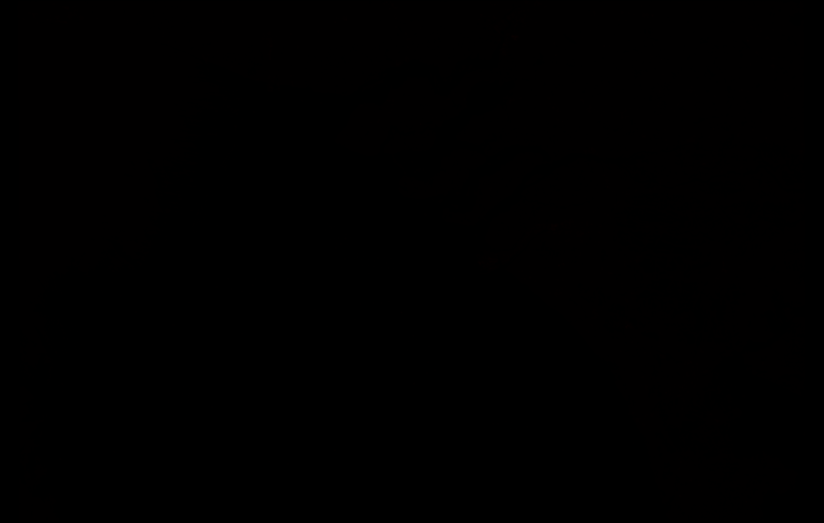

In [31]:
vv_band = load(sentinel1_image.vv_band)
brightness = 1
vv_band = clamp.(vv_band .* brightness, 0.0, 1.0)
vv_color = colorview(RGB, vv_band, zeros(size(vv_band)), zeros(size(vv_band)))


In [34]:
using Images

function display_image(image::Sentinel1Image; brightness::Float64=1.0)
    vv_band = load(image.vv_band)
    vh_band = load(image.vh_band)

    # Adjust brightness
    vv_band = clamp.(vv_band .* brightness, 0.0, 1.0)
    vh_band = clamp.(vh_band .* brightness, 0.0, 1.0)

    # Display the images
    display([vv_band vh_band])
end


display_image (generic function with 1 method)

In [15]:
Pkg.add("Images")

   Resolving package versions...


  No Changes to `~/Documents/coding/JuliaEO2024/Project.toml`
  No Changes to `~/Documents/coding/JuliaEO2024/Manifest.toml`


In [16]:
using Images

In [37]:
using Images

function display_image(image::Sentinel1Image; brightness::Float64=1.0)
    vv_band = load(image.vv_band)
    vh_band = load(image.vh_band)

    # Adjust brightness
    #vv_band = clamp.(vv_band .* brightness, 0.0, 1.0)
    #vh_band = clamp.(vh_band .* brightness, 0.0, 1.0)

    # Display the images
    display([vv_band vh_band])
end


display_image (generic function with 1 method)

In [39]:
Pkg.add("ImageView")

   Resolving package versions...


   Installed GtkObservables ─ v2.0.3
   Installed Gtk4 ─────────── v0.5.4


    Updating `~/Documents/coding/JuliaEO2024/Project.toml`
  [86fae568] + ImageView v0.12.0
    Updating `~/Documents/coding/JuliaEO2024/Manifest.toml`


  [159f3aea] + Cairo v1.0.5
  [9db2cae5] + Gtk4 v0.5.4
  [8710efd8] + GtkObservables v2.0.3
  [86fae568] + ImageView v0.12.0
  [d4071afc] + MultiChannelColors v0.1.3
  [d5f540fe] + RoundingIntegers v1.1.0
  [6ebb71f1] + GTK4_jll v4.10.5+0
  [75302f13] + Graphene_jll v1.10.6+0
  [42c93a91] + Libepoxy_jll v1.5.10+0
  [925c91fb] + Librsvg_jll v2.54.5+0
  [36c8627f] + Pango_jll v1.50.14+0
  [0aeada51] + Xorg_libXdamage_jll v1.1.5+4
  [b437f822] + adwaita_icon_theme_jll v43.0.0+0
  [da03df04] + gdk_pixbuf_jll v2.42.8+0
  [059c91fe] + hicolor_icon_theme_jll v0.17.0+3
  [bf975903] + iso_codes_jll v4.11.0+0


Precompiling project...


  ✓ Gtk4


  ✓ GtkObservables


  ✓ ImageView


  3 dependencies successfully precompiled in 36 seconds. 397 already precompiled.


In [40]:
vh_band_file = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff"
vv_band_file = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"


"/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"

In [41]:
using ImageView, Images

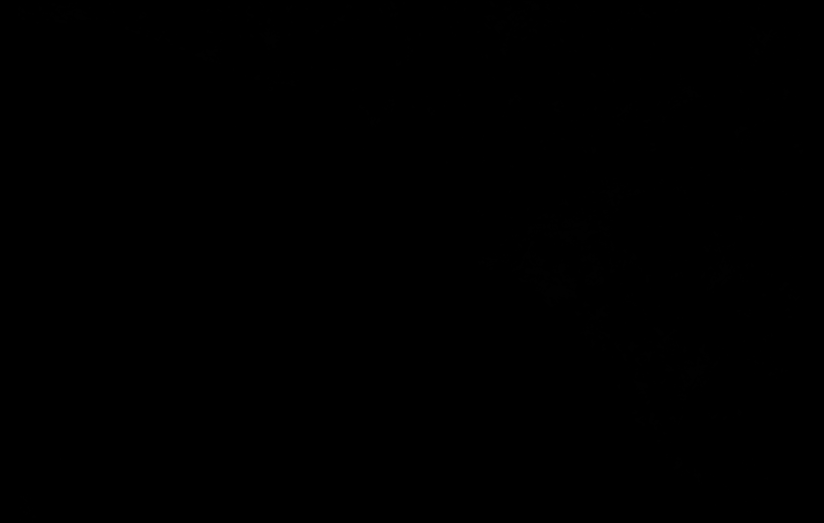

In [42]:

img = load(vh_band_file)

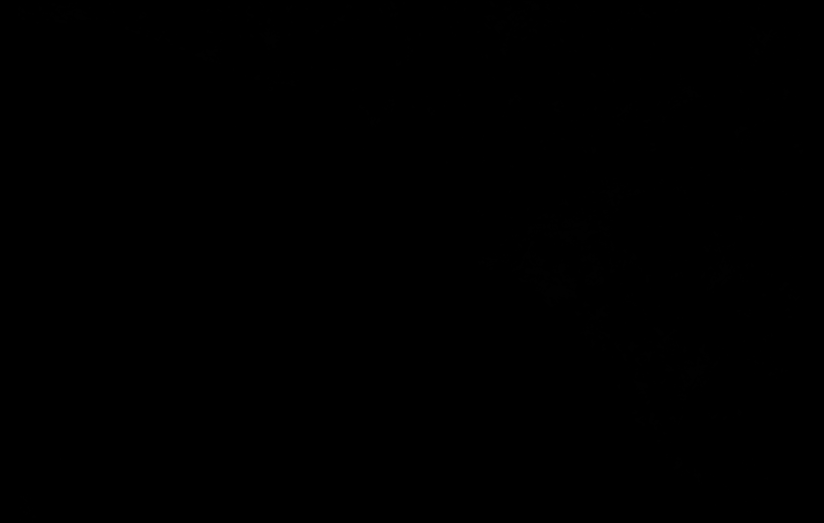

In [43]:
img

In [44]:
imshow(img)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(accessible-role=GT…
  "roi"         => Dict{String, Any}("redraw"=>Observables.ObserverFunction[Obs…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{N0f16}(0.0, 0.94961))

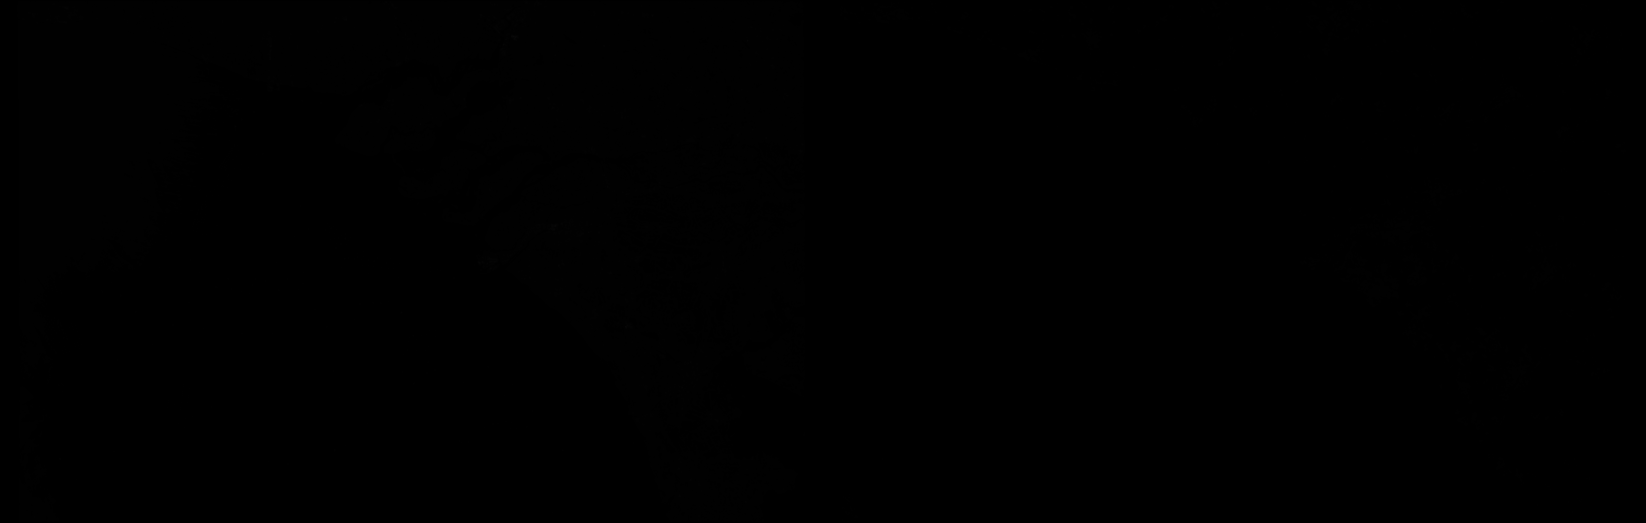

In [38]:


# Display the image with adjustable brightness
display_image(sentinel1_image, brightness=1.0)
